In [1]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(-3, 3)

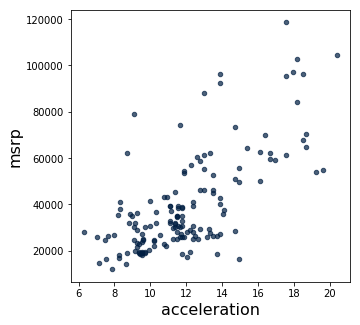

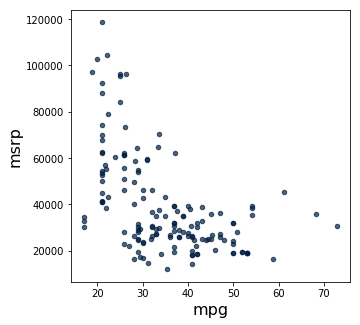

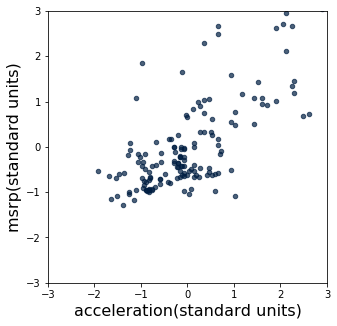

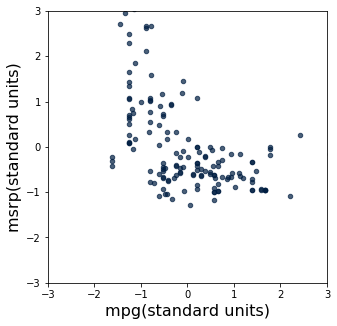

In [22]:
# 15.1 Correlation

hybrid = Table.read_table('hybrid.csv')
hybrid
hybrid.scatter('acceleration', 'msrp')
hybrid.scatter('mpg', 'msrp')

def standard_units(arr):
    return (arr - np.mean(arr))/np.std(arr)

Table().with_columns(
    'acceleration(standard units)', standard_units(hybrid.column('acceleration')),
    'msrp(standard units)', standard_units(hybrid.column('msrp')),
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

Table().with_columns(
    'mpg(standard units)', standard_units(hybrid.column('mpg')),
    'msrp(standard units)', standard_units(hybrid.column('msrp')),
).scatter(0, 1)
plt.xlim(-3, 3)
plt.ylim(-3, 3)

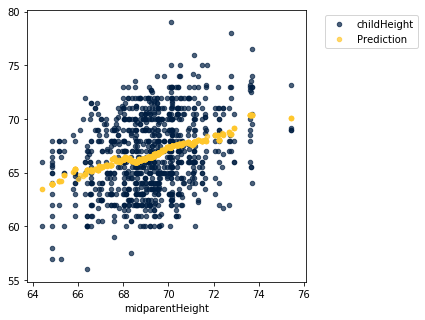

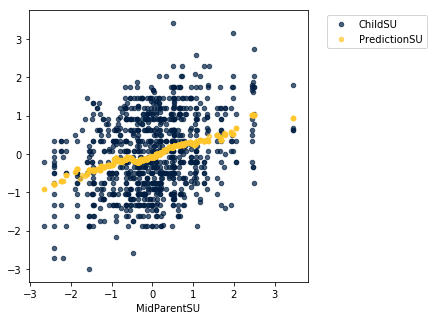

In [43]:
# 15.2 The Regression Line
galton = Table.read_table('galton.csv')
heights = galton.select('midparentHeight', 'childHeight')
heights

def predict_child(mpht):
    close_points = heights.where('midparentHeight', are.between(mpht-0.5, mpht+0.5))
    return close_points.column('childHeight').mean()

heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'midparentHeight')
)
heights_with_predictions.scatter('midparentHeight')

def standard_units(a):
    return (a - np.mean(a)) / np.std(a)

heights_su = Table().with_columns(
    'MidParentSU', standard_units(heights.column('midparentHeight')),
    'ChildSU', standard_units(heights.column('childHeight'))
)

def predict_child_su(mpht_su):
    close = 0.5 / np.std(heights.column('midparentHeight'))
    close_points = heights_su.where('MidParentSU', are.between(mpht_su-close, mpht_su+close))
    return close_points.column('ChildSU').mean()

heights_with_predictions_su = heights_su.with_column(
    'PredictionSU', heights_su.apply(predict_child_su, 'MidParentSU')
)
heights_with_predictions_su.scatter('MidParentSU')

In [55]:
sim = Table.read_table('sim.csv')
sn = sim.column('SN')
sn_prefix = [i[0:2] for i in sn]
sn_prefix_table = Table().with_column(
    'sn_prefix', sn_prefix,
)
sn_prefix_table.group('sn_prefix')

sn_prefix,count
M1,44
MA,68
MB,15
N1,175
U1,88
UB,5
UF,1
